In [1]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import math
import seaborn as sns

In [2]:
def calculate_relative_humidity(temperature_c, dewpoint_c):
    """
    Calculate relative humidity based on temperature and dew point in Celsius.
    
    Args:
        temperature_c (float): the air temperature in degrees Celsius.
        dewpoint_c (float): the dew point temperature in degrees Celsius.
    
    Returns:
        float: relative humidity as a percentage.
    """
    # Constants for saturation vapor pressure calculation
    a = 17.27
    b = 237.7
    
    # Calculate saturation vapor pressure at the current temperature
    def saturation_vapor_pressure(temp):
        return 6.112 * np.exp((a * temp) / (b + temp))
    
    # Saturation vapor pressure at actual temperature
    e_sat = saturation_vapor_pressure(temperature_c)
    
    # Vapor pressure at dew point temperature
    e_dew = saturation_vapor_pressure(dewpoint_c)
    
    # Relative humidity calculation
    relative_humidity = (e_dew / e_sat) * 100
    
    return relative_humidity

In [3]:
msl = xr.open_mfdataset("../data/ERA5/mean_sea_level_pressure_*.nc", combine='by_coords')
t2m = xr.open_mfdataset("../data/ERA5/2m_temperature_*.nc", combine='by_coords')
d2m = xr.open_mfdataset("../data/ERA5/2m_dewpoint_temperature_*.nc", combine='by_coords')
u100 = xr.open_mfdataset("../data/ERA5/100m_u_component_of_wind_*.nc", combine='by_coords')
v100 = xr.open_mfdataset("../data/ERA5/100m_v_component_of_wind_*.nc", combine='by_coords')
u10 = xr.open_mfdataset("../data/ERA5/10m_u_component_of_wind_*.nc", combine='by_coords')
v10 = xr.open_mfdataset("../data/ERA5/10m_v_component_of_wind_*.nc", combine='by_coords')
tntr = xr.open_mfdataset("../data/ERA5/top_net_thermal_radiation_*.nc", combine='by_coords')
tcc = xr.open_mfdataset("../data/ERA5/total_cloud_cover_*.nc", combine='by_coords') 
tpr = xr.open_mfdataset("../data/ERA5/total_precipitation_*.nc", combine='by_coords')

ds = xr.merge([msl, t2m, d2m, u100, v100, u10, v10, tntr, tcc, tpr])

msl.close()
t2m.close()
d2m.close()
u100.close()
v100.close()
u10.close()
v100.close()
tntr.close()
tcc.close()
tpr.close()

# calculate wind speed
ds['ws100'] = np.sqrt(ds['u100']**2 + ds['v100']**2)
ds['ws10'] = np.sqrt(ds['u10']**2 + ds['v10']**2)

# delete unnecessary variables
del ds['u100']
del ds['v100']
del ds['u10']
del ds['v10']
ds['t2m'] = ds['t2m'] - 273.15
ds['d2m'] = ds['d2m'] - 273.15
ds['tcc'] = ds['tcc'] * 100
ds['msl'] = ds['msl'] / 100
ds['tp'] = ds['tp'] * 1000
ds['rh'] = calculate_relative_humidity(ds['t2m'], ds['d2m'])

# convert time to GMT-3
ds['time'] = ds['time'] - np.timedelta64(3, 'h')
# drop the first 3 hours
ds = ds.sel(time=slice('1999-01-01T00:00:00', '2023-12-31T23:00:00'))
ds

<xarray.Dataset> Size: 33MB
Dimensions:    (longitude: 1, latitude: 2, time: 219141)
Coordinates:
  * longitude  (longitude) float32 4B -45.7
  * latitude   (latitude) float32 8B -22.4 -22.65
  * time       (time) datetime64[ns] 2MB 1999-01-01 ... 2023-12-31T20:00:00
Data variables:
    msl        (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    t2m        (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    d2m        (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    ttr        (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    tcc        (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    tp         (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    ws100      (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    ws10       (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    rh         (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-22 02:50:06 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [4]:
ds

<xarray.Dataset> Size: 33MB
Dimensions:    (longitude: 1, latitude: 2, time: 219141)
Coordinates:
  * longitude  (longitude) float32 4B -45.7
  * latitude   (latitude) float32 8B -22.4 -22.65
  * time       (time) datetime64[ns] 2MB 1999-01-01 ... 2023-12-31T20:00:00
Data variables:
    msl        (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    t2m        (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    d2m        (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    ttr        (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    tcc        (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    tp         (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    ws100      (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    ws10       (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
    rh         (time, latitude, longitude) float64 4MB dask.array<chunksize=(43821, 2, 1), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-22 02:50:06 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

Definition of plots labels

In [6]:
variables = list(ds.variables.keys())[3:]
labels = [
    "Mean Sea Level Pressure",
    "2m Temperature",
    "2m Dew Point Temperature",
    "Top Net Thermal Radiation",
    "Total Cloud Cover",
    "Total Precipitation",
    "100m Wind Speed",
    "10m Wind Speed",
    "Relative Humidity"
]
units = [
    "hPa",
    "°C",
    "°C",
    "J/m^2",
    "%",
    "mm",
    "m/s",
    "m/s",
    "%"

]
colors =[
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22"
]

months = [
    'Jan',
    'Feb',
    'Mar',
    'Apr',
    'May',
    'Jun',
    'Jul',
    'Aug',
    'Sep',
    'Oct',
    'Nov',
    'Dec'
]

C:\Users\LPS04\AppData\Local\Temp\ipykernel_46060\1467994027.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(['' for i in ax.get_xticks()])
C:\Users\LPS04\AppData\Local\Temp\ipykernel_46060\1467994027.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(['' for i in ax.get_xticks()])
C:\Users\LPS04\AppData\Local\Temp\ipykernel_46060\1467994027.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(['' for i in ax.get_xticks()])
C:\Users\LPS04\AppData\Local\Temp\ipykernel_46060\1467994027.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(['' for i in ax.get_xticks()])


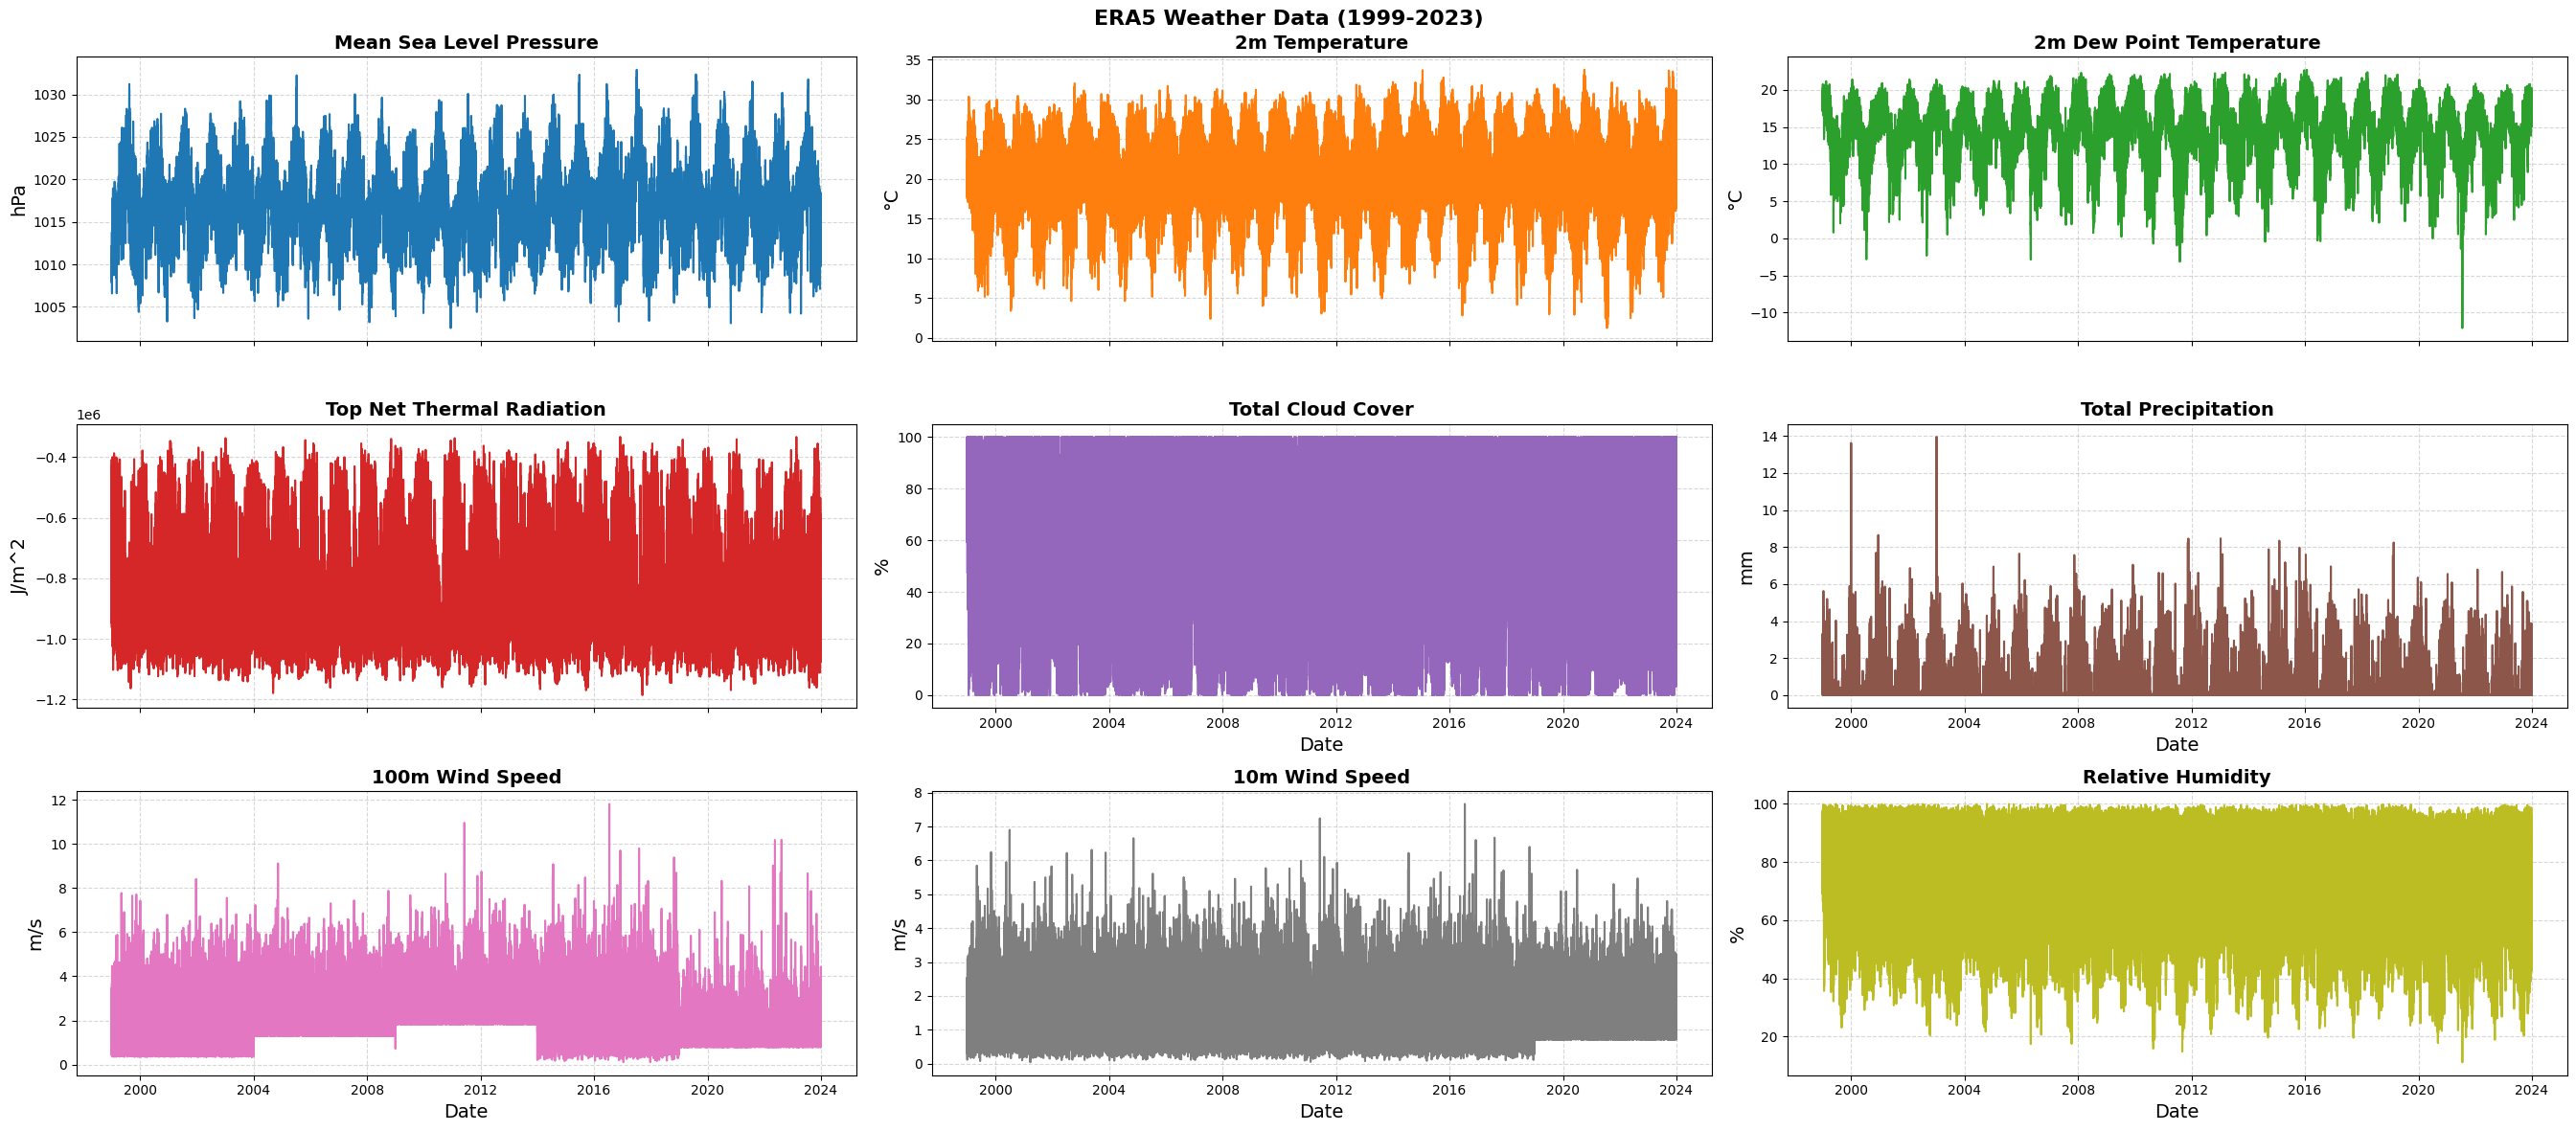

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(27, 12), facecolor='w')
fig.suptitle("ERA5 Weather Data (1999-2023)", fontsize=16, fontweight='bold')

for i, ax in enumerate(axs.flat):
    ds[variables[i]].mean(dim=['latitude', 'longitude']).plot(
        ax=ax,
        color=colors[i],
    )
    ax.set_title(labels[i], fontsize=14, fontweight='bold')
    ax.set_ylabel(units[i], fontsize=14)
    ax.grid(ls="--", alpha=0.5)
    ax.set_xlabel("")
    if i > 3:
        ax.set_xlabel("Date", fontsize=14)
    else:
        # add only '' over xtick labels
        _ = ax.set_xticklabels(['' for i in ax.get_xticks()])

plt.tight_layout()
plt.savefig("../results/era5_weather_data_complete_history.png", dpi=100, bbox_inches='tight', pad_inches=0.1)
plt.show()

/home/edith/anaconda3/envs/GSST/lib/python3.12/site-packages/xarray/core/groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(
/tmp/ipykernel_41955/2020176414.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(['' for i in ax.get_xticks()])
/home/edith/anaconda3/envs/GSST/lib/python3.12/site-packages/xarray/core/groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(
/tmp/ipykernel_41955/2020176414.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(['' for i in ax.get_xticks()])
/home/edith/anaconda3/envs/GSST/lib/python3.12/site-packages/xarray/core/groupby.py:668: FutureWarning: 'M' is depreca

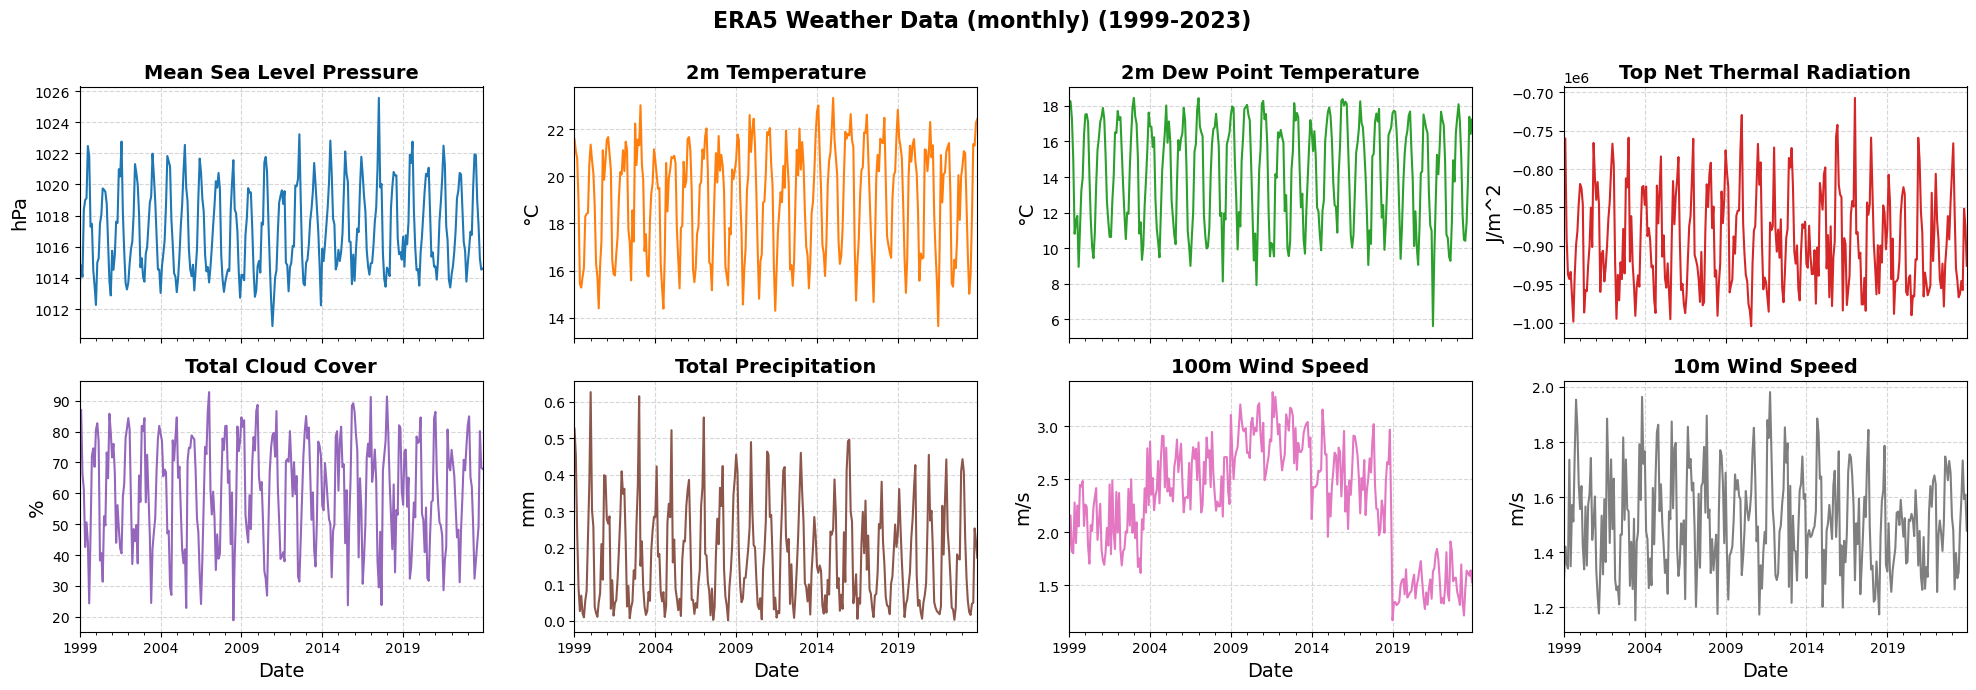

In [66]:
fig, axs = plt.subplots(2, 4, figsize=(20, 7), facecolor='w')
fig.suptitle("ERA5 Weather Data (monthly) (1999-2023)", fontsize=16, fontweight='bold')

for i, ax in enumerate(axs.flat):
    ds[variables[i]].mean(dim=['latitude', 'longitude']).resample(
        time='1M'
    ).mean().to_pandas().plot(
        ax=ax,
        color=colors[i],
    )
    ax.set_title(labels[i], fontsize=14, fontweight='bold')
    ax.set_ylabel(units[i], fontsize=14)
    ax.grid(ls="--", alpha=0.5)
    ax.set_xlabel("")
    if i > 3:
        ax.set_xlabel("Date", fontsize=14)
    else:
        # add only '' over xtick labels
        _ = ax.set_xticklabels(['' for i in ax.get_xticks()])

plt.tight_layout()
plt.savefig("../results/era5_weather_data_complete_monthly.png", dpi=100, bbox_inches='tight', pad_inches=0.1)
plt.show()

/tmp/ipykernel_41955/3945966544.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


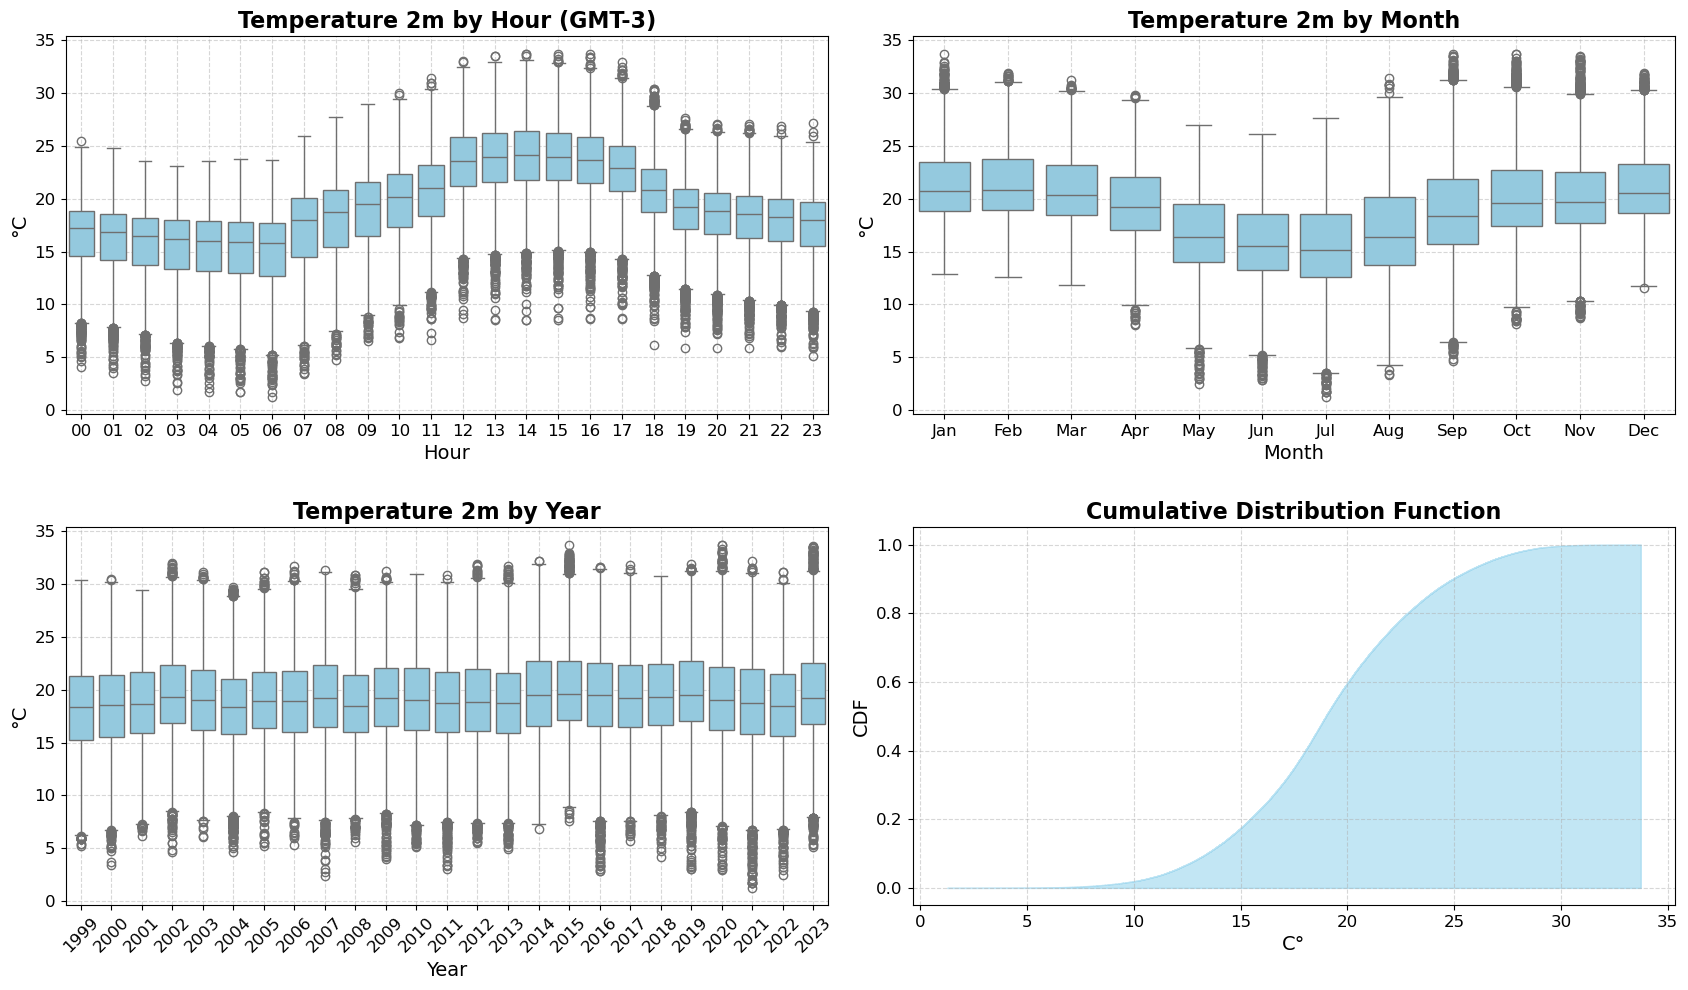

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10), facecolor='w')


# plot boxplot by hour of temperature
data_var = ds['t2m'].mean(dim=['latitude', 'longitude']).to_dataframe()
data_var.columns = ['Temperature 2m']
data_var['hour'] = data_var.index.hour
data_var['hour'] = data_var.apply(lambda x: str(int(x['hour'])).zfill(2), axis=1)
data_var['month'] = data_var.index.month
data_var['month'] = data_var.apply(lambda x: months[x['month']-1], axis=1)
data_var['year'] = data_var.index.year

ax = axs[0][0]
sns.boxplot(x='hour', y='Temperature 2m', data=data_var, ax=ax, color='skyblue')
ax.set_title("Temperature 2m by Hour (GMT-3)", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('°C', fontsize=14)
ax.set_xlabel("Hour", fontsize=14)
# add two levels of grid lines
ax.grid(ls="--", alpha=0.5)


ax = axs[0][1]
sns.boxplot(x='month', y='Temperature 2m', data=data_var, ax=ax, color='skyblue')
ax.set_title("Temperature 2m by Month", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('°C', fontsize=14)
ax.set_xlabel("Month", fontsize=14)
ax.grid(ls="--", alpha=0.5)


ax = axs[1][0]
sns.boxplot(x='year', y='Temperature 2m', data=data_var, ax=ax, color='skyblue')
ax.set_title("Temperature 2m by Year", fontsize=16, fontweight='bold')
# rotation of xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('°C', fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.grid(ls="--", alpha=0.5)

# cumulative distribution function
ax = axs[1][1]
values = np.sort(data_var['Temperature 2m'].values)
cdf = np.arange(1, len(values)+1) / len(values)
ax.fill_between(values, cdf, color='skyblue', alpha=0.5)
ax.set_title("Cumulative Distribution Function", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('CDF', fontsize=14)
ax.set_xlabel("C°", fontsize=14)
ax.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("../results/era5_temperature_2m_boxplot.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_41955/1130104091.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


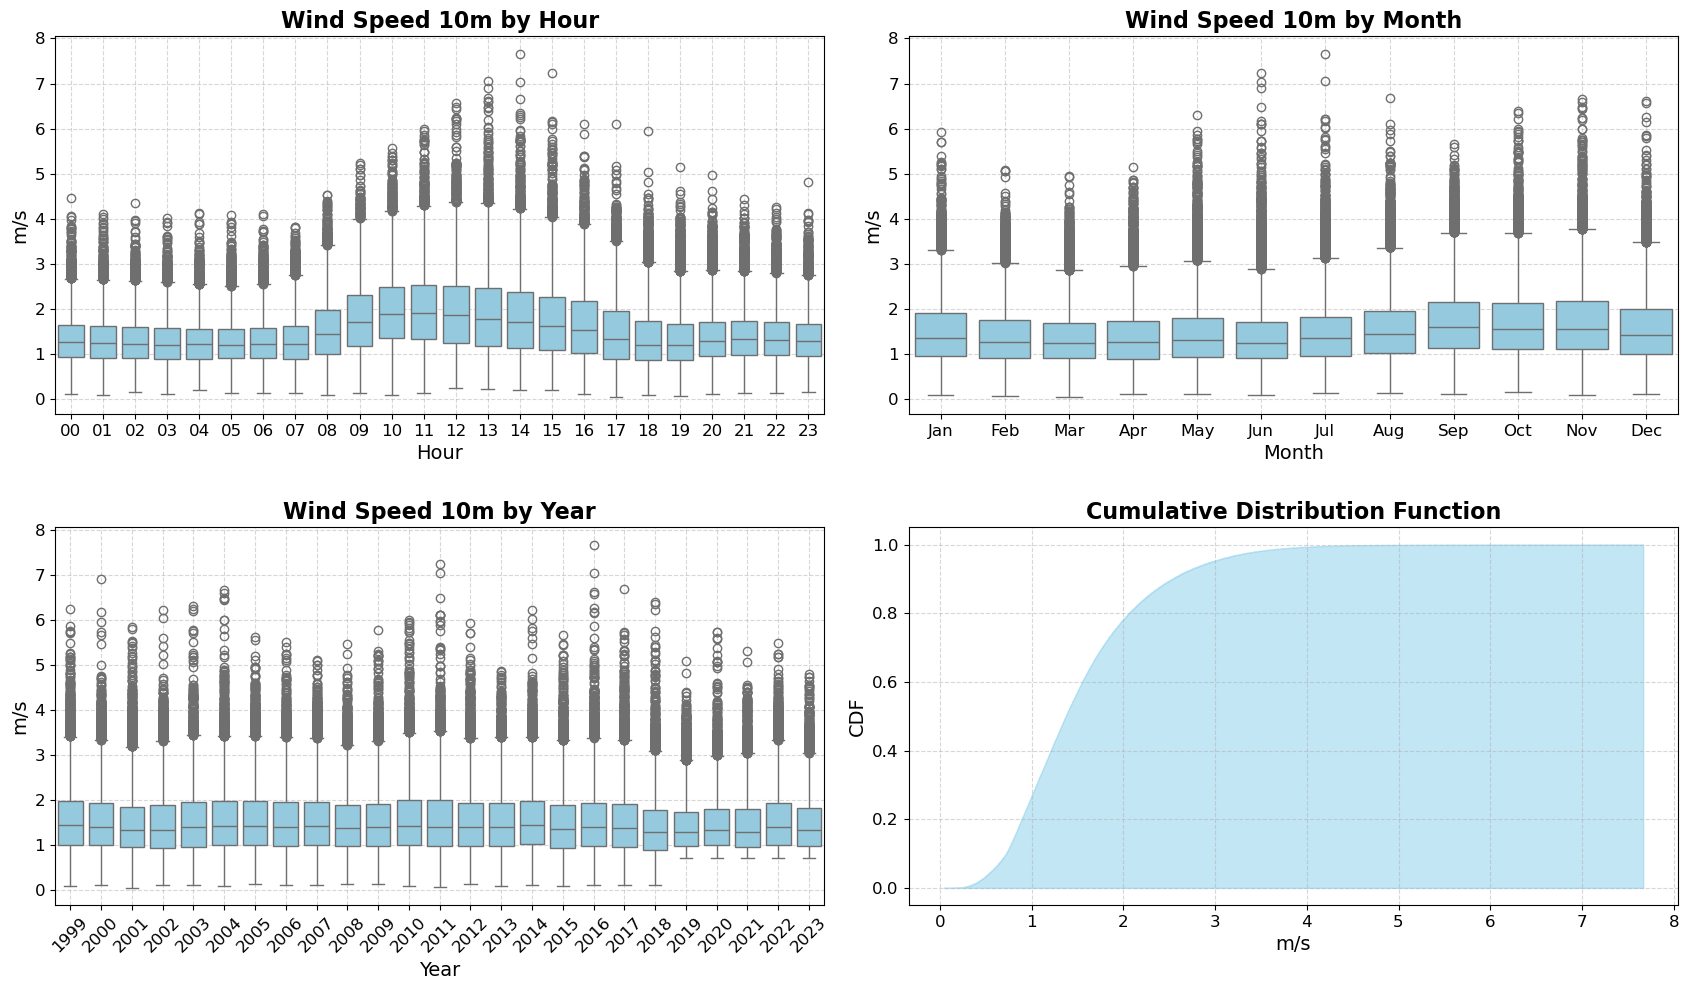

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10), facecolor='w')


# plot boxplot by hour of temperature
data_var = ds['ws10'].mean(dim=['latitude', 'longitude']).to_dataframe()
data_var.columns = ['Wind Speed 10m']
data_var['hour'] = data_var.index.hour
data_var['hour'] = data_var.apply(lambda x: str(int(x['hour'])).zfill(2), axis=1)
data_var['month'] = data_var.index.month
data_var['month'] = data_var.apply(lambda x: months[x['month']-1], axis=1)
data_var['year'] = data_var.index.year

ax = axs[0][0]
sns.boxplot(x='hour', y='Wind Speed 10m', data=data_var, ax=ax, color='skyblue')
ax.set_title("Wind Speed 10m by Hour", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('m/s', fontsize=14)
ax.set_xlabel("Hour", fontsize=14)
# add two levels of grid lines
ax.grid(ls="--", alpha=0.5)


ax = axs[0][1]
sns.boxplot(x='month', y='Wind Speed 10m', data=data_var, ax=ax, color='skyblue')
ax.set_title("Wind Speed 10m by Month", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('m/s', fontsize=14)
ax.set_xlabel("Month", fontsize=14)
ax.grid(ls="--", alpha=0.5)


ax = axs[1][0]
sns.boxplot(x='year', y='Wind Speed 10m', data=data_var, ax=ax, color='skyblue')
ax.set_title("Wind Speed 10m by Year", fontsize=16, fontweight='bold')
# rotation of xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('m/s', fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.grid(ls="--", alpha=0.5)

# cumulative distribution function
ax = axs[1][1]
values = np.sort(data_var['Wind Speed 10m'].values)
cdf = np.arange(1, len(values)+1) / len(values)
ax.fill_between(values, cdf, color='skyblue', alpha=0.5)
ax.set_title("Cumulative Distribution Function", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('CDF', fontsize=14)
ax.set_xlabel("m/s", fontsize=14)
ax.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("../results/era5_wind_speed_10m_boxplot.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_41955/3803954581.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


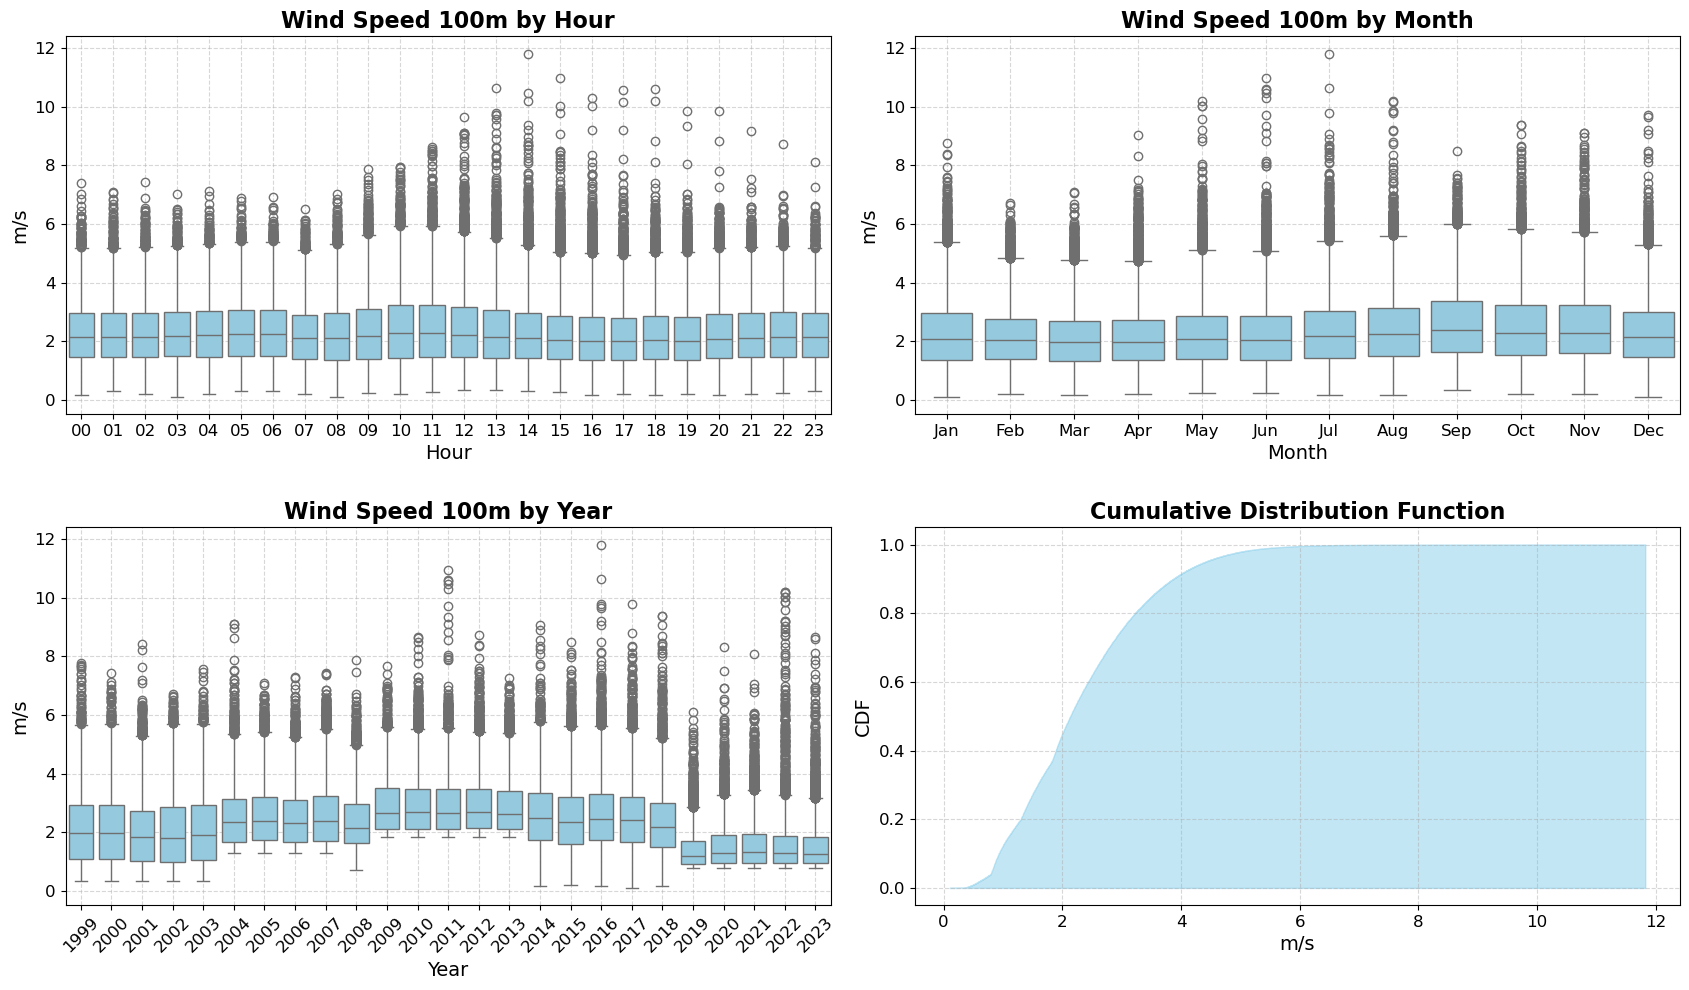

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10), facecolor='w')


# plot boxplot by hour of temperature
data_var = ds['ws100'].mean(dim=['latitude', 'longitude']).to_dataframe()
data_var.columns = ['Wind Speed 100m']
data_var['hour'] = data_var.index.hour
data_var['hour'] = data_var.apply(lambda x: str(int(x['hour'])).zfill(2), axis=1)
data_var['month'] = data_var.index.month
data_var['month'] = data_var.apply(lambda x: months[x['month']-1], axis=1)
data_var['year'] = data_var.index.year

ax = axs[0][0]
sns.boxplot(x='hour', y='Wind Speed 100m', data=data_var, ax=ax, color='skyblue')
ax.set_title("Wind Speed 100m by Hour", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('m/s', fontsize=14)
ax.set_xlabel("Hour", fontsize=14)
# add two levels of grid lines
ax.grid(ls="--", alpha=0.5)


ax = axs[0][1]
sns.boxplot(x='month', y='Wind Speed 100m', data=data_var, ax=ax, color='skyblue')
ax.set_title("Wind Speed 100m by Month", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('m/s', fontsize=14)
ax.set_xlabel("Month", fontsize=14)
ax.grid(ls="--", alpha=0.5)


ax = axs[1][0]
sns.boxplot(x='year', y='Wind Speed 100m', data=data_var, ax=ax, color='skyblue')
ax.set_title("Wind Speed 100m by Year", fontsize=16, fontweight='bold')
# rotation of xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('m/s', fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.grid(ls="--", alpha=0.5)

# cumulative distribution function
ax = axs[1][1]
values = np.sort(data_var['Wind Speed 100m'].values)
cdf = np.arange(1, len(values)+1) / len(values)
ax.fill_between(values, cdf, color='skyblue', alpha=0.5)
ax.set_title("Cumulative Distribution Function", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('CDF', fontsize=14)
ax.set_xlabel("m/s", fontsize=14)
ax.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("../results/era5_wind_speed_100m_boxplot.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_41955/2931079626.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


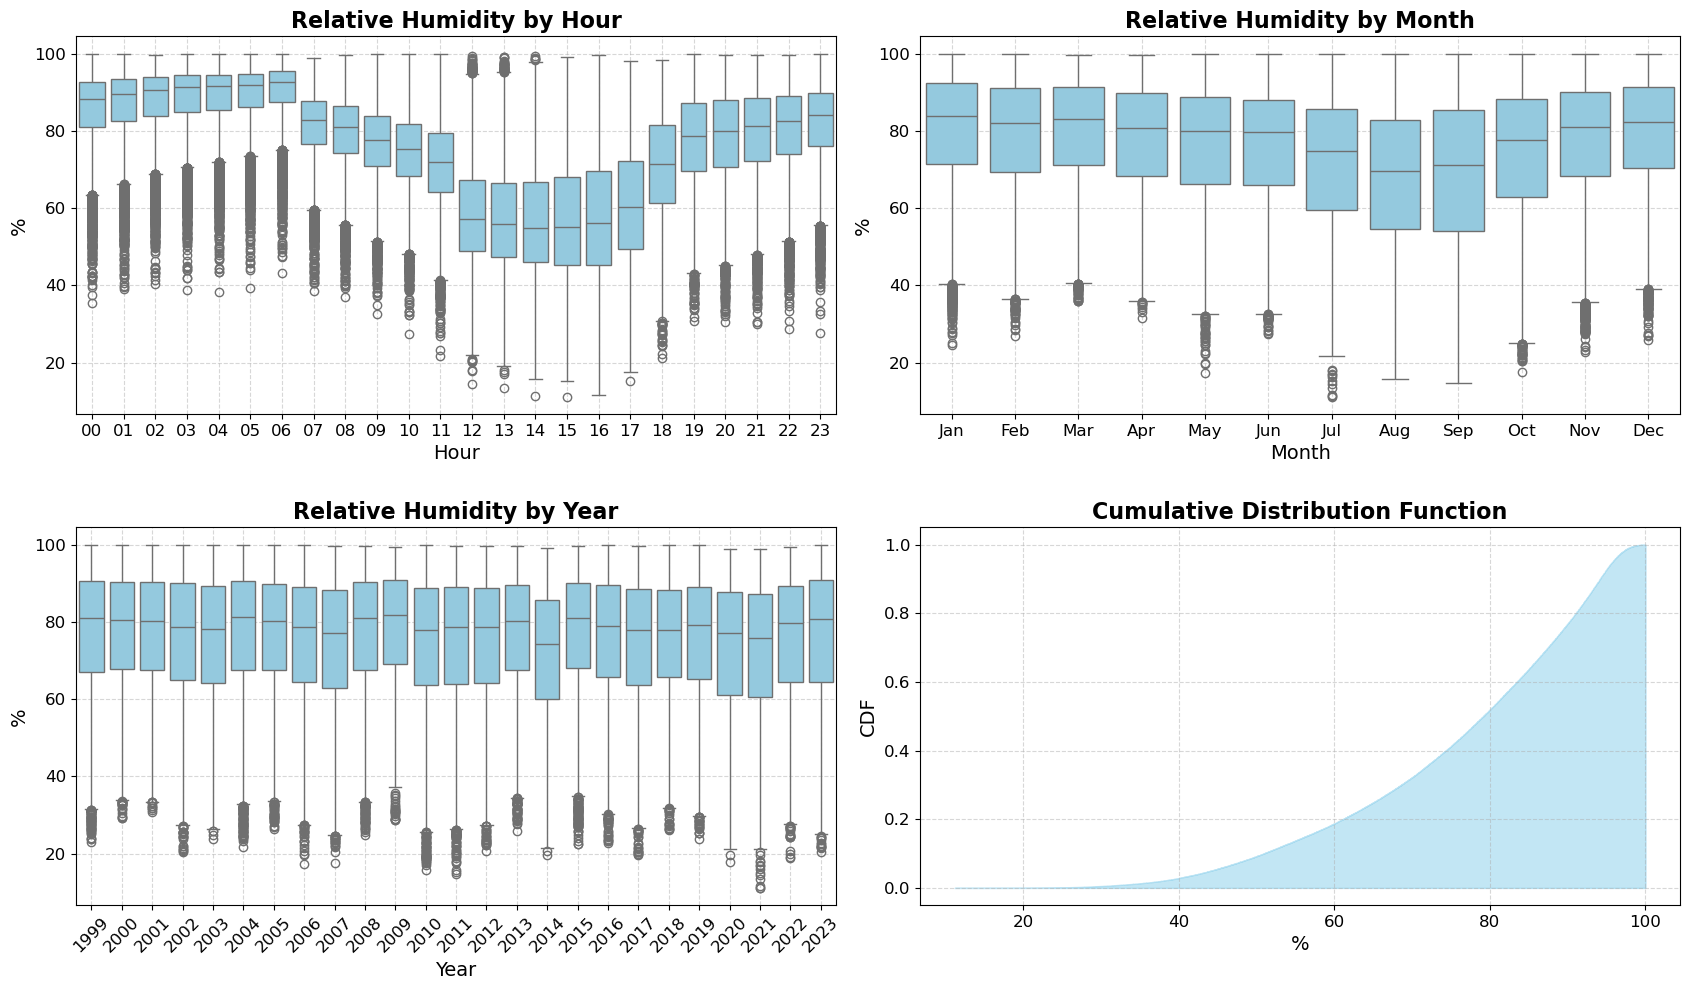

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10), facecolor='w')


# plot boxplot by hour of temperature
data_var = ds['rh'].mean(dim=['latitude', 'longitude']).to_dataframe()
data_var.columns = ['Relative Humidity']
data_var['hour'] = data_var.index.hour
data_var['hour'] = data_var.apply(lambda x: str(int(x['hour'])).zfill(2), axis=1)
data_var['month'] = data_var.index.month
data_var['month'] = data_var.apply(lambda x: months[x['month']-1], axis=1)
data_var['year'] = data_var.index.year

ax = axs[0][0]
sns.boxplot(x='hour', y='Relative Humidity', data=data_var, ax=ax, color='skyblue')
ax.set_title("Relative Humidity by Hour", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('%', fontsize=14)
ax.set_xlabel("Hour", fontsize=14)
# add two levels of grid lines
ax.grid(ls="--", alpha=0.5)


ax = axs[0][1]
sns.boxplot(x='month', y='Relative Humidity', data=data_var, ax=ax, color='skyblue')
ax.set_title("Relative Humidity by Month", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('%', fontsize=14)
ax.set_xlabel("Month", fontsize=14)
ax.grid(ls="--", alpha=0.5)


ax = axs[1][0]
sns.boxplot(x='year', y='Relative Humidity', data=data_var, ax=ax, color='skyblue')
ax.set_title("Relative Humidity by Year", fontsize=16, fontweight='bold')
# rotation of xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('%', fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.grid(ls="--", alpha=0.5)

# cumulative distribution function
ax = axs[1][1]
values = np.sort(data_var['Relative Humidity'].values)
cdf = np.arange(1, len(values)+1) / len(values)
ax.fill_between(values, cdf, color='skyblue', alpha=0.5)
ax.set_title("Cumulative Distribution Function", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('CDF', fontsize=14)
ax.set_xlabel("%", fontsize=14)
ax.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("../results/era5_relative_humidity_boxplot.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_41955/139355640.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


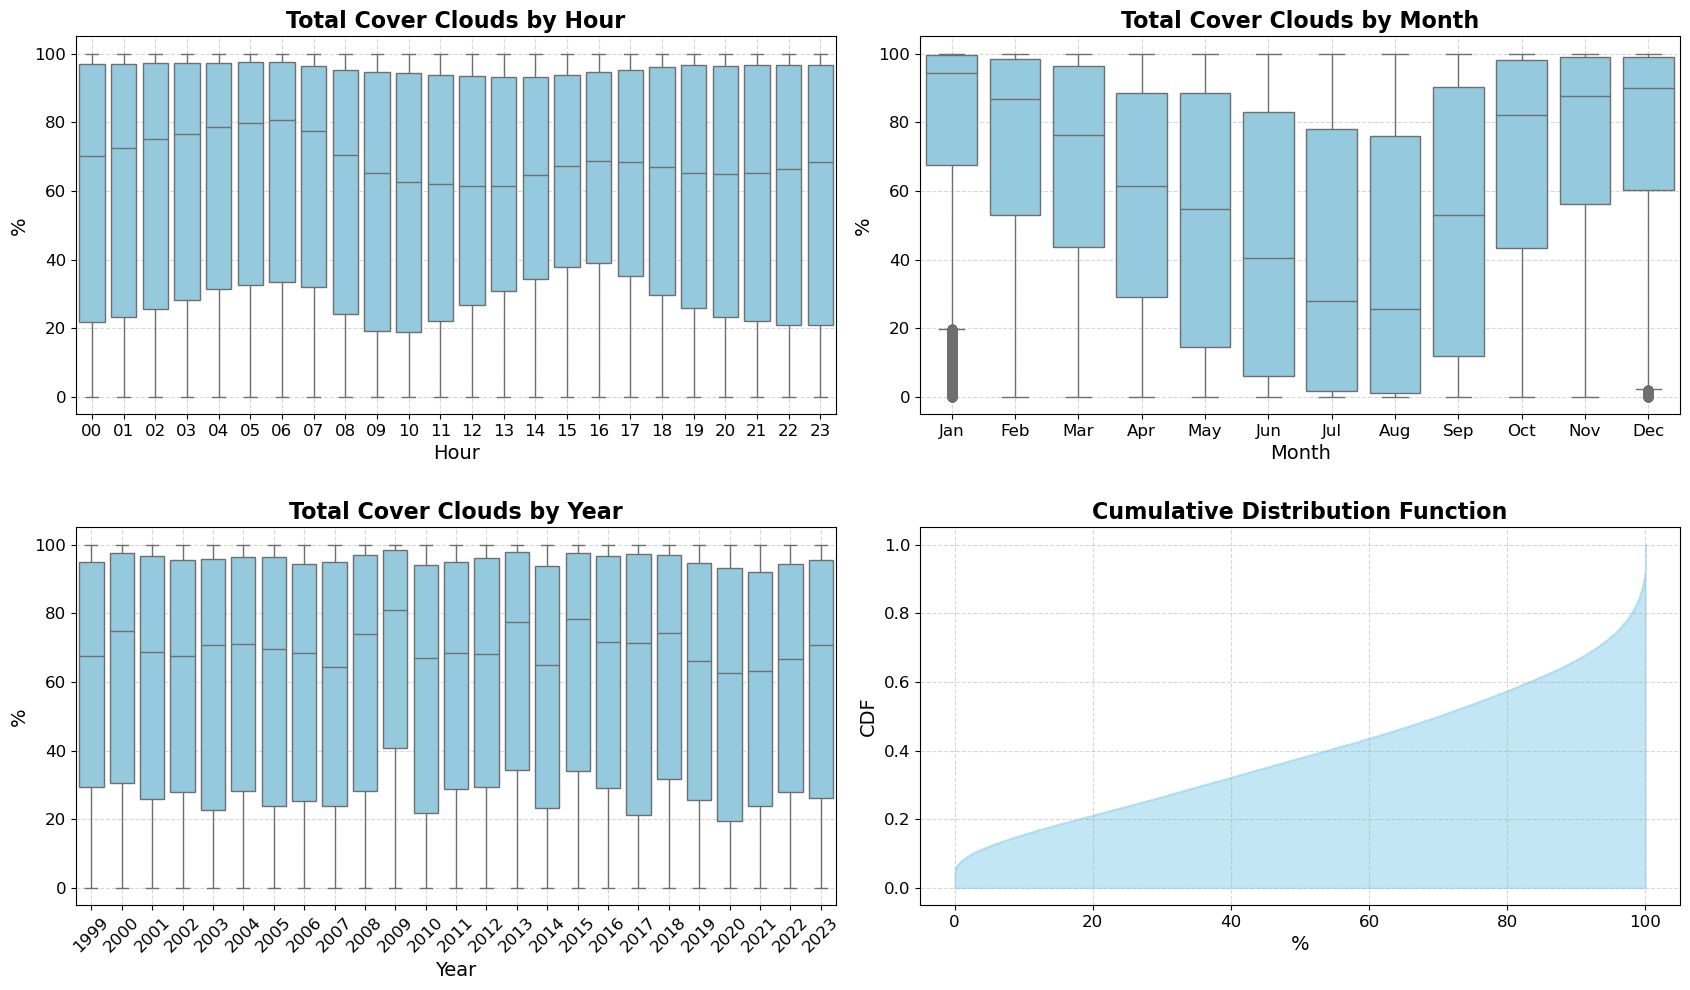

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10), facecolor='w')


# plot boxplot by hour of temperature
data_var = ds['tcc'].mean(dim=['latitude', 'longitude']).to_dataframe()
data_var.columns = ['Total Cover Clouds']
data_var['hour'] = data_var.index.hour
data_var['hour'] = data_var.apply(lambda x: str(int(x['hour'])).zfill(2), axis=1)
data_var['month'] = data_var.index.month
data_var['month'] = data_var.apply(lambda x: months[x['month']-1], axis=1)
data_var['year'] = data_var.index.year

ax = axs[0][0]
sns.boxplot(x='hour', y='Total Cover Clouds', data=data_var, ax=ax, color='skyblue')
ax.set_title("Total Cover Clouds by Hour", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('%', fontsize=14)
ax.set_xlabel("Hour", fontsize=14)
# add two levels of grid lines
ax.grid(ls="--", alpha=0.5)


ax = axs[0][1]
sns.boxplot(x='month', y='Total Cover Clouds', data=data_var, ax=ax, color='skyblue')
ax.set_title("Total Cover Clouds by Month", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('%', fontsize=14)
ax.set_xlabel("Month", fontsize=14)
ax.grid(ls="--", alpha=0.5)


ax = axs[1][0]
sns.boxplot(x='year', y='Total Cover Clouds', data=data_var, ax=ax, color='skyblue')
ax.set_title("Total Cover Clouds by Year", fontsize=16, fontweight='bold')
# rotation of xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('%', fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.grid(ls="--", alpha=0.5)

# cumulative distribution function
ax = axs[1][1]
values = np.sort(data_var['Total Cover Clouds'].values)
cdf = np.arange(1, len(values)+1) / len(values)
ax.fill_between(values, cdf, color='skyblue', alpha=0.5)
ax.set_title("Cumulative Distribution Function", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('CDF', fontsize=14)
ax.set_xlabel("%", fontsize=14)
ax.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("../results/era5_total_cover_clouds_boxplot.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

/home/edith/anaconda3/envs/GSST/lib/python3.12/site-packages/xarray/core/groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(
/home/edith/anaconda3/envs/GSST/lib/python3.12/site-packages/xarray/core/groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


<Axes: title={'center': 'Temperature vs Pressure'}, xlabel='Temperature', ylabel='Pressure'>

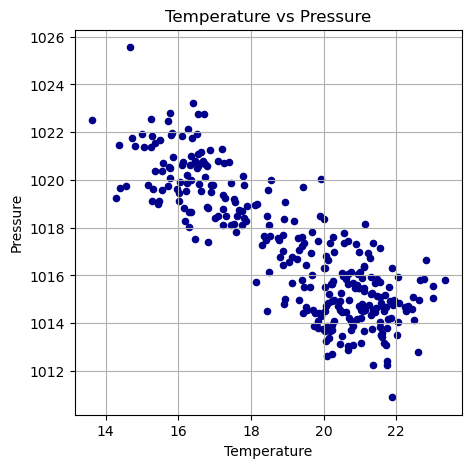

In [31]:
t2m = ds['t2m'].mean(dim=['latitude', 'longitude']).resample(
    time='1M'
).mean().to_pandas()
mslp = ds['msl'].mean(dim=['latitude', 'longitude']).resample(
    time='1M'
).mean().to_pandas()

pd.DataFrame({
    "Temperature": t2m,
    "Pressure": mslp
}).plot.scatter(
    x="Temperature",
    y="Pressure",
    c="DarkBlue",
    figsize=(5, 5),
    title="Temperature vs Pressure",
    grid=True
)

/tmp/ipykernel_41955/1680838597.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


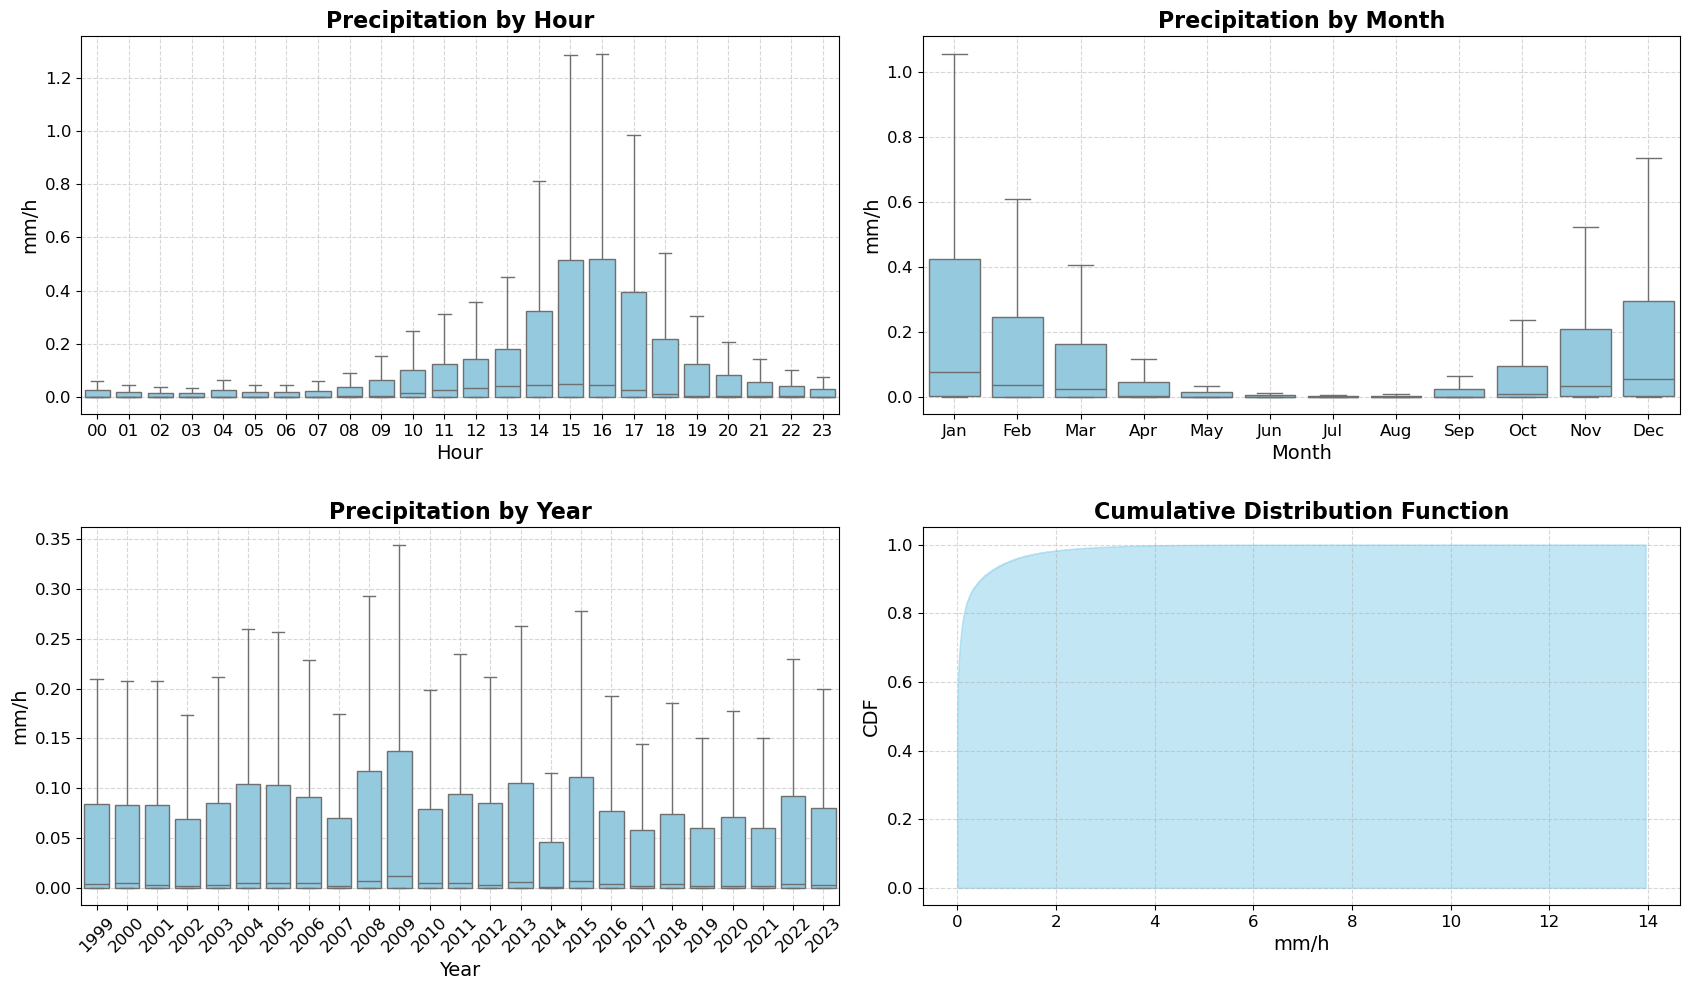

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10), facecolor='w')


# plot boxplot by hour of temperature
data_var = ds['tp'].mean(dim=['latitude', 'longitude']).to_dataframe()
data_var.columns = ['Precipitation']
data_var['hour'] = data_var.index.hour
data_var['hour'] = data_var.apply(lambda x: str(int(x['hour'])).zfill(2), axis=1)
data_var['month'] = data_var.index.month
data_var['month'] = data_var.apply(lambda x: months[x['month']-1], axis=1)
data_var['year'] = data_var.index.year

ax = axs[0][0]
sns.boxplot(x='hour', y='Precipitation', data=data_var, ax=ax, color='skyblue', showfliers=False)
ax.set_title("Precipitation by Hour", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('mm/h', fontsize=14)
ax.set_xlabel("Hour", fontsize=14)
# add two levels of grid lines
ax.grid(ls="--", alpha=0.5)


ax = axs[0][1]
sns.boxplot(x='month', y='Precipitation', data=data_var, ax=ax, color='skyblue', showfliers=False)
ax.set_title("Precipitation by Month", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('mm/h', fontsize=14)
ax.set_xlabel("Month", fontsize=14)
ax.grid(ls="--", alpha=0.5)


ax = axs[1][0]
sns.boxplot(x='year', y='Precipitation', data=data_var, ax=ax, color='skyblue',showfliers=False)
ax.set_title("Precipitation by Year", fontsize=16, fontweight='bold')
# rotation of xticklabels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('mm/h', fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.grid(ls="--", alpha=0.5)

# cumulative distribution function
ax = axs[1][1]
values = np.sort(data_var['Precipitation'].values)
cdf = np.arange(1, len(values)+1) / len(values)
ax.fill_between(values, cdf, color='skyblue', alpha=0.5)
ax.set_title("Cumulative Distribution Function", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('CDF', fontsize=14)
ax.set_xlabel("mm/h", fontsize=14)
ax.grid(ls="--", alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("../results/era5_precipitation_boxplot.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

In [75]:
df_temp = ds.mean(dim=['latitude', 'longitude']).resample(
    time='1M'
).sum().to_dataframe()[['tp']]
df_temp

/home/edith/anaconda3/envs/GSST/lib/python3.12/site-packages/xarray/core/groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


,tp
time,
1999-01-31,391.334005
1999-02-28,305.014932
1999-03-31,178.452603
1999-04-30,64.930888
1999-05-31,20.063019
...,...
2023-08-31,35.077295
2023-09-30,35.813853
2023-10-31,188.364012


/tmp/ipykernel_41955/376716457.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


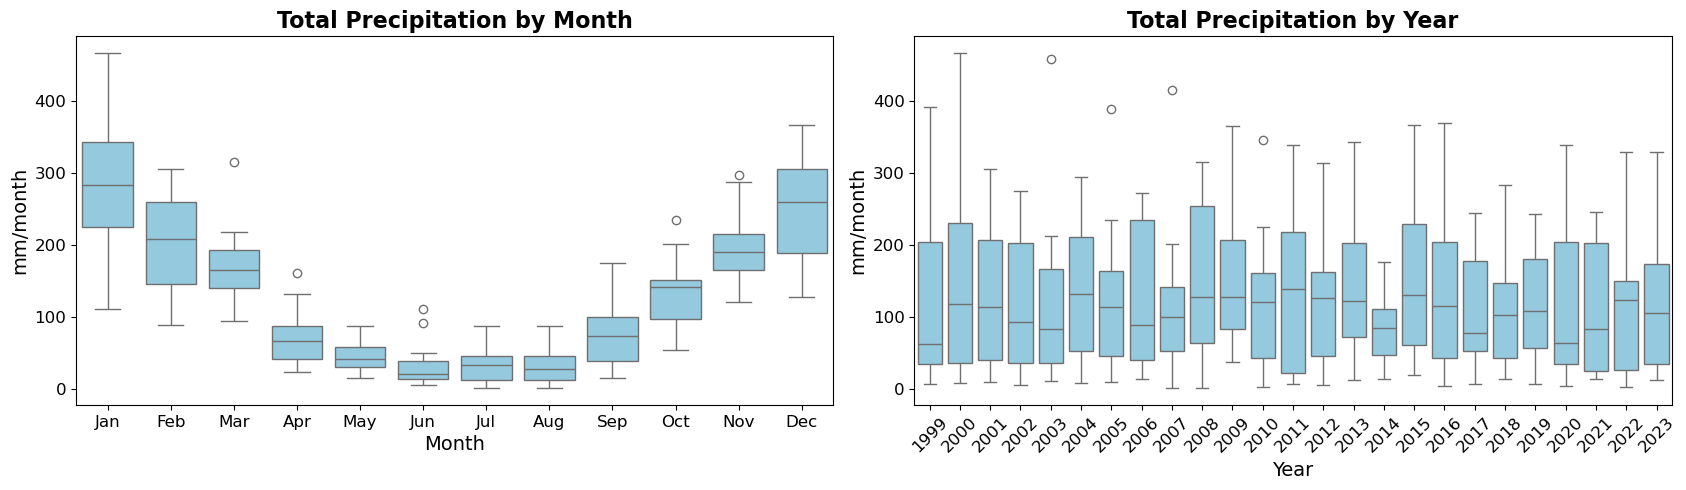

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(17, 5), facecolor='w')

df_temp['month'] = df_temp.index.month
df_temp['month'] = df_temp.apply(lambda x: months[int(x['month'])-1], axis=1)
df_temp['year'] = df_temp.index.year

ax = axs[0]
sns.boxplot(x='month', y='tp', data=df_temp, ax=ax, color='skyblue')
ax.set_title("Total Precipitation by Month", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('mm/month', fontsize=14)
ax.set_xlabel("Month", fontsize=14)

ax = axs[1]
sns.boxplot(x='year', y='tp', data=df_temp, ax=ax, color='skyblue')
ax.set_title("Total Precipitation by Year", fontsize=16, fontweight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('mm/month', fontsize=14)
ax.set_xlabel("Year", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.savefig("../results/era5_total_precipitation_accumulated_boxplot.png", dpi=100, bbox_inches='tight', pad_inches=0.1)

In [78]:
stats_df = ds.mean(dim=['latitude', 'longitude']).to_dataframe().describe().T
stats_df.index = labels
stats_df

,count,mean,std,min,25%,50%,75%,max
Mean Sea Level Pressure,219141.0,1017.088721,3.999601,1.002511e+03,1014.323661,1016.827890,1019.745276,1032.896683
2m Temperature,219141.0,19.085818,4.397441,1.253486e+00,16.230051,18.983466,21.996360,33.736505
2m Dew Point Temperature,219141.0,14.221267,3.628238,-1.207887e+01,11.739947,14.834700,17.161157,22.695976
Top Net Thermal Radiation,219141.0,-892787.552056,147881.335948,-1.185737e+06,-995930.566855,-948822.288128,-815379.583366,-333221.791048
Total Cloud Cover,219141.0,60.413307,36.100701,0.000000e+00,27.158935,69.990946,95.967255,100.000364
Total Precipitation,219141.0,0.174163,0.502811,-8.673617e-16,0.000000,0.003651,0.084049,13.952645
100m Wind Speed,219141.0,2.304092,1.138333,1.002450e-01,1.429831,2.133808,2.990492,11.821586
10m Wind Speed,219141.0,1.513178,0.745188,3.996699e-02,0.970172,1.370754,1.899914,7.666701
Relative Humidity,219141.0,75.685591,16.375615,1.117668e+01,65.093960,79.141852,89.298063,100.003858
